In [2]:
#1. 社交网络构建与分析
#a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。  （network[user][friends/score])
#b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
import json
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "hw4_data.json")

with open(desktop_path, "r") as f:
    data = json.load(f)

network = {}

for node in data["nodes"]:
    user, score = node
    network[user] = {"score": score, "friends": []}

for edge in data["edges"]:
    user1, user2, weight = edge
    network[user1]["friends"].append(user2)
    network[user2]["friends"].append(user1)

for user in network:
    print(f"{user}'s friends: {network[user]['friends']}")


Yanyan-Wang's friends: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca's friends: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu's friends: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998's friends: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lid

In [2]:
#2. 统计与度中心性分析
#a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
#b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
#c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。
import json
import os


desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "hw4_data.json")

with open(desktop_path, "r") as f:
    data = json.load(f)

network = {}

for node in data["nodes"]:
    user, score = node
    network[user] = {"score": score, "friends": []}

for edge in data["edges"]:
    user1, user2, weight = edge
    network[user1]["friends"].append(user2)
    network[user2]["friends"].append(user1)

degree_count = {user: len(network[user]['friends']) for user in network}
top_5_by_degree = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 users by degree (number of friends):")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree} friends")

top_5_by_influence = sorted(network.items(), key=lambda x: x[1]['score'], reverse=True)[:5]

print("\nTop 5 users by influence score:")
for user, info in top_5_by_influence:
    print(f"{user}: Influence score {info['score']}")

combined_scores = {
    user: 0.5 * network[user]['score'] + 0.5 * degree_count[user]
    for user in network
}

top_5_by_combined = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 most influential users (combined influence score and degree):")
for user, combined_score in top_5_by_combined:
    print(f"{user}: Combined score {combined_score}")


Top 5 users by degree (number of friends):
tyn1998: 30 friends
frank-zsy: 30 friends
pomelo-nwu: 24 friends
andyhuang18: 23 friends
wj23027: 23 friends

Top 5 users by influence score:
Yanyan-Wang: Influence score 50.95
Aarebecca: Influence score 23.82
pomelo-nwu: Influence score 22.36
tyn1998: Influence score 16.64
frank-zsy: Influence score 15.8

Top 5 most influential users (combined influence score and degree):
Yanyan-Wang: Combined score 32.475
tyn1998: Combined score 23.32
pomelo-nwu: Combined score 23.18
frank-zsy: Combined score 22.9
Aarebecca: Combined score 17.41


In [3]:
#3. 推荐新朋友
#a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。(在本题我才用的是将朋友的连接强度与他们朋友的连接强度相乘，得到更合理的推荐得分）
#b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
import json
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "hw4_data.json")
with open(desktop_path, "r") as f:
    data = json.load(f)

nodes = data["nodes"]
edges = data["edges"]

friendship = {}
for edge in edges:
    user1, user2, weight = edge
    if user1 not in friendship:
        friendship[user1] = {}
    if user2 not in friendship:
        friendship[user2] = {}
    
    friendship[user1][user2] = weight
    friendship[user2][user1] = weight

yanyan_friends = set(friendship.get("Yanyan-Wang", {}).keys())
potential_friends = {}

for friend in yanyan_friends:
    friend_strength = sum(friendship[friend].values())  
    friends_of_friend = set(friendship.get(friend, {}).keys())
    
    for potential_friend in friends_of_friend:
        if potential_friend != "Yanyan-Wang" and potential_friend not in yanyan_friends:
            potential_friend_strength = sum(friendship.get(potential_friend, {}).values())
            score = friend_strength * potential_friend_strength
            
            if potential_friend not in potential_friends:
                potential_friends[potential_friend] = 0
            potential_friends[potential_friend] += score

recommended_friends = sorted(potential_friends.items(), key=lambda x: x[1], reverse=True)

connection_strength = {}
for friend, weight in friendship.get("Yanyan-Wang", {}).items():
    connection_strength[friend] = weight

for user in friendship:
    if user != "Yanyan-Wang":
        strength = friendship["Yanyan-Wang"].get(user, 0)
        if user in connection_strength:
            connection_strength[user] += strength
        else:
            connection_strength[user] = strength

top_connections = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]

print("推荐的新朋友（朋友的朋友）:")
for friend, score in recommended_friends:
    print(f"{friend}（推荐得分：{score}）")

print("\n连接强度最高的5个用户:")
for user, strength in top_connections:
    print(f"{user}（连接强度：{strength}）")


推荐的新朋友（朋友的朋友）:
will-ww（推荐得分：79943.2556）
Zzzzzhuzhiwei（推荐得分：70538.6006）
zhicheng-ning（推荐得分：61849.437000000005）
lhbvvvvv（推荐得分：57881.0414）
PureNatural（推荐得分：57150.79760000001）
xgdyp（推荐得分：57054.907000000014）
birdflyi（推荐得分：44884.176999999996）
xiaoya-yaya（推荐得分：40731.376399999994）
stevending1st（推荐得分：35698.0536）
longyanz（推荐得分：24120.174000000006）
wxharry（推荐得分：16811.602499999997）
zhaosj975（推荐得分：13446.812600000005）
pranavshuklaa（推荐得分：13051.962000000003）
stealth-bombeer（推荐得分：11626.576500000001）
Vlad116（推荐得分：10548.846000000003）
kunal8411（推荐得分：6724.6410000000005）

连接强度最高的5个用户:
Aarebecca（连接强度：50.6）
pomelo-nwu（连接强度：50.18）
yangzy0603（连接强度：23.7）
tyn1998（连接强度：19.24）
yvonneyx（连接强度：14.78）


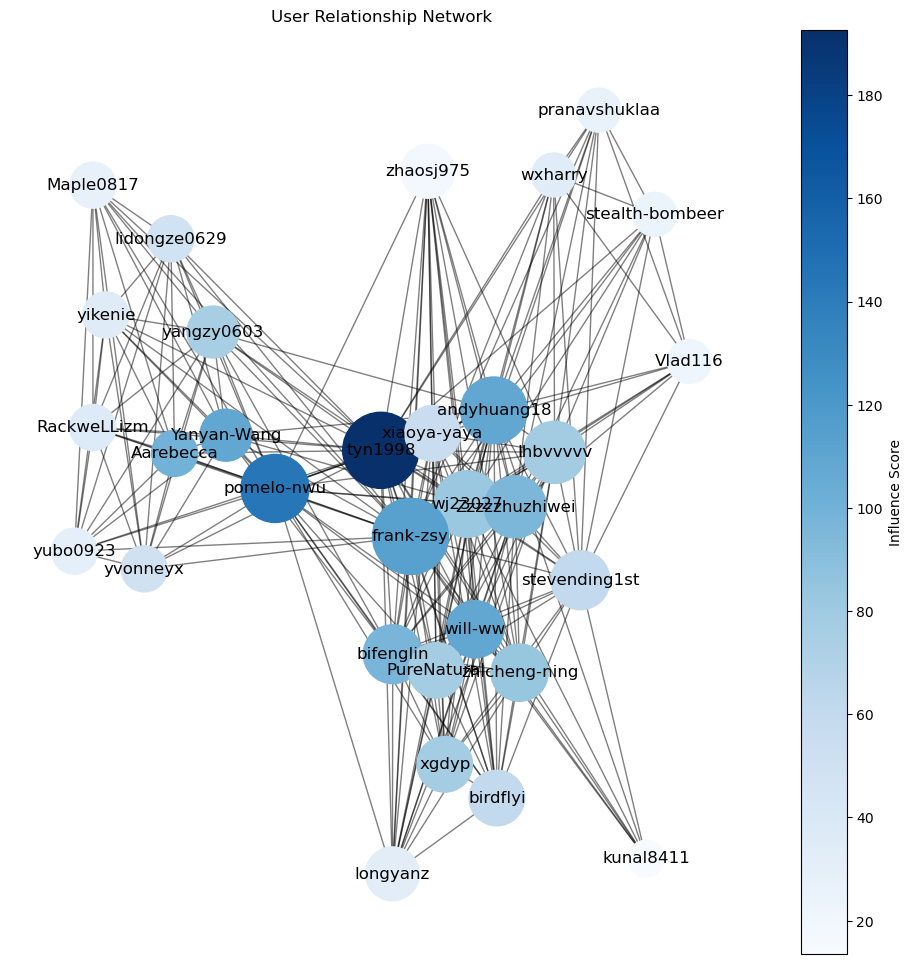

In [7]:
#4. 网络图的可视化
#a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
#b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "hw4_data.json")

with open(desktop_path, "r") as f:
    data = json.load(f)

nodes = data["nodes"]
edges = data["edges"]

friendship = {}
for node in nodes:
    friendship[node[0]] = {}

for edge in edges:
    user1, user2, strength = edge[0], edge[1], edge[2]
    friendship[user1][user2] = strength
    friendship[user2][user1] = strength 


G = nx.Graph()

for user, connections in friendship.items():
    G.add_node(user)
    for friend, strength in connections.items():
        G.add_edge(user, friend, weight=strength)

influence_scores = {user: sum(friendship[user].values()) for user in G.nodes()}

degree_dict = dict(G.degree())

node_colors = [influence_scores[user] for user in G.nodes()]
node_sizes = [degree_dict[user] * 100 for user in G.nodes()]  

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  

nx.draw_networkx_edges(G, pos, alpha=0.5)
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos)

plt.colorbar(nodes, label='Influence Score')


plt.title("User Relationship Network")
plt.axis('off')
plt.show()
